In [1]:
%pip install pandas numpy faker

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install Faker

import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Parameters
num_records = 500000
countries = ["UK", "USA", "Germany", "France", "Norway", "India", "Canada", "Japan", "Australia", "Brazil", "South Africa"]
resources = ["/index.html", "/scheduledemo.php", "/prototype.php", "/event.php", "/images/events.jpg"]
response_codes = [200, 404, 500, 304]
request_types = ["GET", "POST"]
sales_channels = ["Online", "Physical"]
salespersons = ["Ben", "Abishola", "Constance", "Peter", "Emma"]
retail_stores = ["Retail A", "Retail B", "Retail C", "Retail D"]
customer_segments = ["Small Business", "Enterprise", "Individual", "Startup"]

# Salesperson ID map
salesperson_ids = {name: f"SP{str(i+1).zfill(3)}" for i, name in enumerate(salespersons)}

# Country revenue multipliers
country_revenue_multiplier = {
    "UK": 1.1, "USA": 1.3, "Germany": 1.2, "France": 1.0, "Norway": 0.9,
    "India": 0.8, "Canada": 1.05, "Japan": 1.15, "Australia": 1.1,
    "Brazil": 0.85, "South Africa": 0.75
}

# Salesperson effectiveness factor
salesperson_effectiveness = {
    "Ben": 1.2,
    "Abishola": 1.1,
    "Constance": 1.3,
    "Peter": 0.95,
    "Emma": 1.05
}

# Product and industry setup
all_products = set(p for plist in {
    "Finance": ["AI Assistant Pro", "Market Forecaster", "Insight Analyzer"],
    "Healthcare": ["Smart HR Helper", "AI Assistant Pro", "Experience Tracker"],
    "Retail": ["Insight Analyzer", "Experience Tracker", "Rapid Proto Builder"],
    "Technology": ["DevOps AI Companion", "Rapid Proto Builder", "AI Assistant Pro"],
    "Education": ["Smart HR Helper", "Experience Tracker"],
    "Manufacturing": ["Market Forecaster", "DevOps AI Companion"],
    "Telecommunications": ["Insight Analyzer", "AI Assistant Pro"],
    "Logistics": ["Market Forecaster", "DevOps AI Companion", "Insight Analyzer"]
}.values() for p in plist)
product_ids = {product: f"P{str(i+1).zfill(4)}" for i, product in enumerate(all_products)}
industries_products = {
    "Finance": ["AI Assistant Pro", "Market Forecaster", "Insight Analyzer"],
    "Healthcare": ["Smart HR Helper", "AI Assistant Pro", "Experience Tracker"],
    "Retail": ["Insight Analyzer", "Experience Tracker", "Rapid Proto Builder"],
    "Technology": ["DevOps AI Companion", "Rapid Proto Builder", "AI Assistant Pro"],
    "Education": ["Smart HR Helper", "Experience Tracker"],
    "Manufacturing": ["Market Forecaster", "DevOps AI Companion"],
    "Telecommunications": ["Insight Analyzer", "AI Assistant Pro"],
    "Logistics": ["Market Forecaster", "DevOps AI Companion", "Insight Analyzer"]
}
industry_list = list(industries_products.keys())

# Generate data
data = []
for _ in range(num_records):
    timestamp = fake.date_time_this_year()
    ip_address = fake.ipv4()
    country = random.choice(countries)
    request_type = random.choice(request_types)
    resource = random.choice(resources)
    response_code = random.choice(response_codes)
    jobs_placed = np.random.randint(0, 10)
    demo_requests = np.random.randint(0, 5)
    ai_assistant_requests = np.random.randint(0, 3)
    sales_channel = random.choice(sales_channels)
    salesperson = random.choice(salespersons)
    salesperson_id = salesperson_ids[salesperson]
    retail_store = random.choice(retail_stores)

    # Revenue based on country and salesperson effectiveness
    base_revenue = np.random.randint(50, 1000)
    multiplier = country_revenue_multiplier[country] * salesperson_effectiveness[salesperson]
    revenue = int(base_revenue * multiplier)

    industry = random.choice(industry_list)
    product = random.choice(industries_products[industry])
    product_id = product_ids[product]

    customer_name = fake.company()
    customer_id = f"CUST{fake.unique.random_int(1000, 999999)}"
    customer_segment = random.choice(customer_segments)

    # Estimate average price per unit between $20 and $100 depending on product
    avg_price_per_unit = random.uniform(20, 100)
    sales = max(1, int(revenue / avg_price_per_unit))  # At least 1 unit sold

    data.append([
        timestamp, ip_address, country, request_type, resource, response_code,
        jobs_placed, demo_requests, ai_assistant_requests, sales_channel,
        salesperson, salesperson_id, retail_store, revenue, sales,
        product, product_id, industry, customer_name, customer_id, customer_segment
    ])
# Column headers
columns = ["Timestamp", "IP Address", "Country", "Request Type", "Resource Requested", "Response Code",
           "Jobs Placed", "Demo Requests", "AI Assistant Requests", "Sales Channel",
           "Salesperson", "Salesperson ID", "Retail Store", "Revenue", "Sales", "Product", "Product ID", "Industry",
           "Customer Name", "Customer ID", "Customer Segment"]

# Create and save DataFrame
df = pd.DataFrame(data, columns=columns)
df.to_csv("web_logs_data2.csv", index=False)

print("Dataset created and saved as 'web_logs_data.csv'")


Note: you may need to restart the kernel to use updated packages.
Dataset created and saved as 'web_logs_data.csv'


In [3]:
'''import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Parameters
num_records = 500000
countries = ["UK", "USA", "Germany", "France", "Norway", "India", "Canada", "Japan", "Australia", "Brazil", "South Africa"]
resources = ["/index.html", "/scheduledemo.php", "/prototype.php", "/event.php", "/images/events.jpg"]
response_codes = [200, 404, 500, 304]
request_types = ["GET", "POST"]
sales_channels = ["Online", "Physical"]
salespersons = ["Ben", "Abishola", "Constance", "Peter", "Emma"]
retail_stores = ["Retail A", "Retail B", "Retail C", "Retail D"]
customer_segments = ["Small Business", "Enterprise", "Individual", "Startup"]

# Salesperson ID map
salesperson_ids = {name: f"SP{str(i+1).zfill(3)}" for i, name in enumerate(salespersons)}

# Country revenue multipliers
country_revenue_multiplier = {
    "UK": 1.1, "USA": 1.3, "Germany": 1.2, "France": 1.0, "Norway": 0.9,
    "India": 0.8, "Canada": 1.05, "Japan": 1.15, "Australia": 1.1,
    "Brazil": 0.85, "South Africa": 0.75
}

# Salesperson effectiveness factor
salesperson_effectiveness = {
    "Ben": 1.2,
    "Abishola": 1.1,
    "Constance": 1.3,
    "Peter": 0.95,
    "Emma": 1.05
}

# Product and industry setup
all_products = set(p for plist in {
    "Finance": ["AI Assistant Pro", "Market Forecaster", "Insight Analyzer"],
    "Healthcare": ["Smart HR Helper", "AI Assistant Pro", "Experience Tracker"],
    "Retail": ["Insight Analyzer", "Experience Tracker", "Rapid Proto Builder"],
    "Technology": ["DevOps AI Companion", "Rapid Proto Builder", "AI Assistant Pro"],
    "Education": ["Smart HR Helper", "Experience Tracker"],
    "Manufacturing": ["Market Forecaster", "DevOps AI Companion"],
    "Telecommunications": ["Insight Analyzer", "AI Assistant Pro"],
    "Logistics": ["Market Forecaster", "DevOps AI Companion", "Insight Analyzer"]
}.values() for p in plist)
product_ids = {product: f"P{str(i+1).zfill(4)}" for i, product in enumerate(all_products)}
industries_products = {
    "Finance": ["AI Assistant Pro", "Market Forecaster", "Insight Analyzer"],
    "Healthcare": ["Smart HR Helper", "AI Assistant Pro", "Experience Tracker"],
    "Retail": ["Insight Analyzer", "Experience Tracker", "Rapid Proto Builder"],
    "Technology": ["DevOps AI Companion", "Rapid Proto Builder", "AI Assistant Pro"],
    "Education": ["Smart HR Helper", "Experience Tracker"],
    "Manufacturing": ["Market Forecaster", "DevOps AI Companion"],
    "Telecommunications": ["Insight Analyzer", "AI Assistant Pro"],
    "Logistics": ["Market Forecaster", "DevOps AI Companion", "Insight Analyzer"]
}
industry_list = list(industries_products.keys())

# Generate data
data = []
for _ in range(num_records):
    timestamp = fake.date_time_this_year()
    ip_address = fake.ipv4()
    country = random.choice(countries)
    request_type = random.choice(request_types)
    resource = random.choice(resources)
    response_code = random.choice(response_codes)
    jobs_placed = np.random.randint(0, 10)
    demo_requests = np.random.randint(0, 5)
    ai_assistant_requests = np.random.randint(0, 3)
    sales_channel = random.choice(sales_channels)
    salesperson = random.choice(salespersons)
    salesperson_id = salesperson_ids[salesperson]
    retail_store = random.choice(retail_stores)

    # Generate units sold ('Sales')
    sales_units = np.random.randint(1, 20)  # number of units sold in this transaction

    # Determine an average price per unit based on some logic (e.g., random within a range)
    avg_price_per_unit = np.random.uniform(10, 200)  # for example, $10 to $200 per unit

    # Calculate revenue as units sold * price per unit
    revenue = round(sales_units * avg_price_per_unit, 2)

    industry = random.choice(industry_list)
    product = random.choice(industries_products[industry])
    product_id = product_ids[product]

    customer_name = fake.company()
    customer_id = f"CUST{fake.unique.random_int(1000, 999999)}"
    customer_segment = random.choice(customer_segments)

    data.append([
        timestamp, ip_address, country, request_type, resource, response_code,
        jobs_placed, demo_requests, ai_assistant_requests, sales_channel,
        salesperson, salesperson_id, retail_store, revenue, product, product_id, industry,
        customer_name, customer_id, customer_segment,
        sales_units  # include sales units for clarity
    ])

# Column headers
columns = ["Timestamp", "IP Address", "Country", "Request Type", "Resource Requested", "Response Code",
           "Jobs Placed", "Demo Requests", "AI Assistant Requests", "Sales Channel",
           "Salesperson", "Salesperson ID", "Retail Store", "Revenue", "Product", "Product ID", "Industry",
           "Customer Name", "Customer ID", "Customer Segment", "Sales"]  # added 'Sales'

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Save dataset
df.to_csv("web_logs_data1.csv", index=False)

print("Dataset created and saved as 'web_logs_data1.csv'")'''

'import pandas as pd\nimport numpy as np\nfrom faker import Faker\nimport random\n\n# Initialize Faker\nfake = Faker()\n\n# Parameters\nnum_records = 500000\ncountries = ["UK", "USA", "Germany", "France", "Norway", "India", "Canada", "Japan", "Australia", "Brazil", "South Africa"]\nresources = ["/index.html", "/scheduledemo.php", "/prototype.php", "/event.php", "/images/events.jpg"]\nresponse_codes = [200, 404, 500, 304]\nrequest_types = ["GET", "POST"]\nsales_channels = ["Online", "Physical"]\nsalespersons = ["Ben", "Abishola", "Constance", "Peter", "Emma"]\nretail_stores = ["Retail A", "Retail B", "Retail C", "Retail D"]\ncustomer_segments = ["Small Business", "Enterprise", "Individual", "Startup"]\n\n# Salesperson ID map\nsalesperson_ids = {name: f"SP{str(i+1).zfill(3)}" for i, name in enumerate(salespersons)}\n\n# Country revenue multipliers\ncountry_revenue_multiplier = {\n    "UK": 1.1, "USA": 1.3, "Germany": 1.2, "France": 1.0, "Norway": 0.9,\n    "India": 0.8, "Canada": 1.05, "

In [4]:
# Load dataset
#df = pd.read_csv("web_logs_data.csv")

# Display first few rows
df.head()

,Timestamp,IP Address,Country,Request Type,Resource Requested,Response Code,Jobs Placed,Demo Requests,AI Assistant Requests,Sales Channel,...,Salesperson ID,Retail Store,Revenue,Sales,Product,Product ID,Industry,Customer Name,Customer ID,Customer Segment
0,2025-01-20 11:14:17,9.72.209.236,India,GET,/index.html,304,5,2,2,Physical,...,SP005,Retail D,763,16,Rapid Proto Builder,P0007,Retail,Obrien-Miller,CUST724570,Enterprise
1,2025-01-19 23:23:10,164.234.126.225,India,POST,/images/events.jpg,304,2,2,1,Physical,...,SP001,Retail C,888,10,Insight Analyzer,P0001,Finance,"Marshall, Williams and Bennett",CUST646573,Small Business
2,2025-04-21 05:29:23,102.221.233.224,India,GET,/images/events.jpg,200,4,2,1,Online,...,SP005,Retail A,614,14,AI Assistant Pro,P0006,Healthcare,"Mills, Hammond and Swanson",CUST876212,Small Business
3,2025-01-26 18:21:16,201.124.36.138,Australia,GET,/scheduledemo.php,500,2,3,1,Online,...,SP003,Retail B,647,15,Insight Analyzer,P0001,Retail,Lawrence-Clarke,CUST295894,Small Business
4,2025-05-02 15:58:21,168.198.160.16,USA,POST,/prototype.php,404,9,3,1,Online,...,SP003,Retail A,481,22,Experience Tracker,P0005,Retail,Gonzales PLC,CUST206256,Small Business


In [6]:
# Display basic info
print("📄 Dataset Info:")
print(df.info())


📄 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Timestamp              500000 non-null  datetime64[ns]
 1   IP Address             500000 non-null  object        
 2   Country                500000 non-null  object        
 3   Request Type           500000 non-null  object        
 4   Resource Requested     500000 non-null  object        
 5   Response Code          500000 non-null  int64         
 6   Jobs Placed            500000 non-null  int64         
 7   Demo Requests          500000 non-null  int64         
 8   AI Assistant Requests  500000 non-null  int64         
 9   Sales Channel          500000 non-null  object        
 10  Salesperson            500000 non-null  object        
 11  Salesperson ID         500000 non-null  object        
 12  Retail Store           50000

In [7]:
#Check for missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())


🔍 Missing Values:
Timestamp                0
IP Address               0
Country                  0
Request Type             0
Resource Requested       0
Response Code            0
Jobs Placed              0
Demo Requests            0
AI Assistant Requests    0
Sales Channel            0
Salesperson              0
Salesperson ID           0
Retail Store             0
Revenue                  0
Sales                    0
Product                  0
Product ID               0
Industry                 0
Customer Name            0
Customer ID              0
Customer Segment         0
dtype: int64


In [8]:
# Summary statistics
print("\n📊 Summary Statistics:")
print(df.describe(include='all'))


📊 Summary Statistics:
                            Timestamp      IP Address Country Request Type  \
count                          500000          500000  500000       500000   
unique                            NaN          499974      11            2   
top                               NaN  75.117.177.238  Canada         POST   
freq                              NaN               2   45698       250244   
mean    2025-03-12 23:14:03.800268288             NaN     NaN          NaN   
min               2025-01-01 00:00:02             NaN     NaN          NaN   
25%     2025-02-05 09:44:26.249999872             NaN     NaN          NaN   
50%               2025-03-12 23:14:18             NaN     NaN          NaN   
75%               2025-04-17 11:55:41             NaN     NaN          NaN   
max               2025-05-22 21:00:14             NaN     NaN          NaN   
std                               NaN             NaN     NaN          NaN   

       Resource Requested  Response Code

In [9]:
# Convert Timestamp to datetime if not already
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour

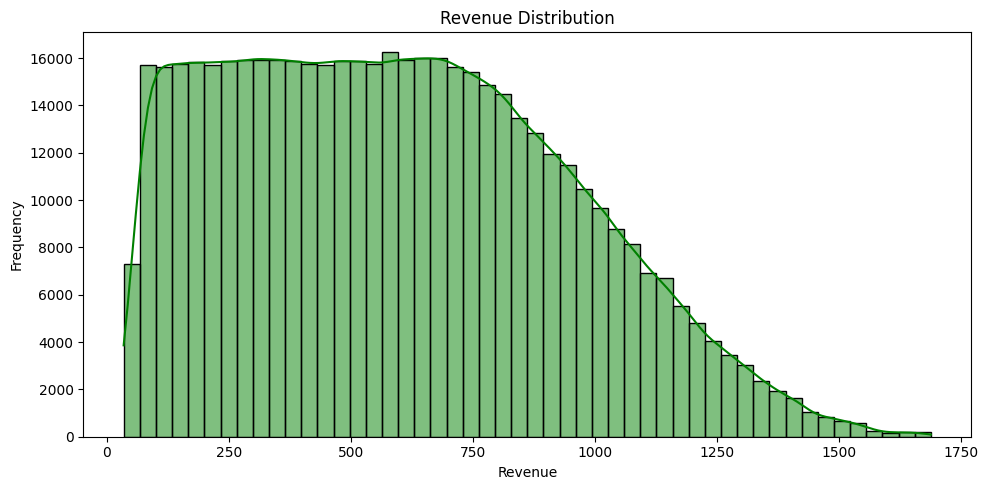

In [10]:
# Revenue distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Revenue'], bins=50, kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

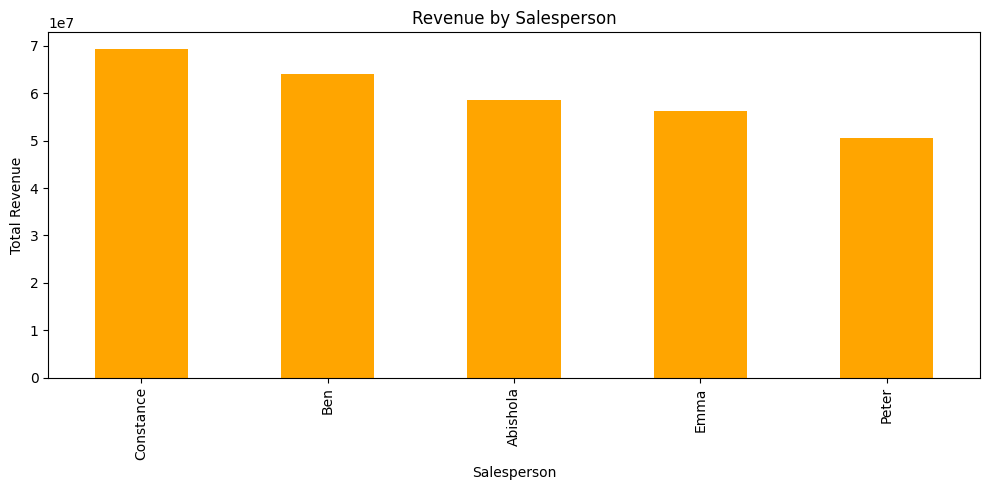

In [11]:
# Salesperson performance
plt.figure(figsize=(10, 5))
sales_perf = df.groupby("Salesperson")['Revenue'].sum().sort_values(ascending=False)
sales_perf.plot(kind='bar', color='orange')
plt.title("Revenue by Salesperson")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

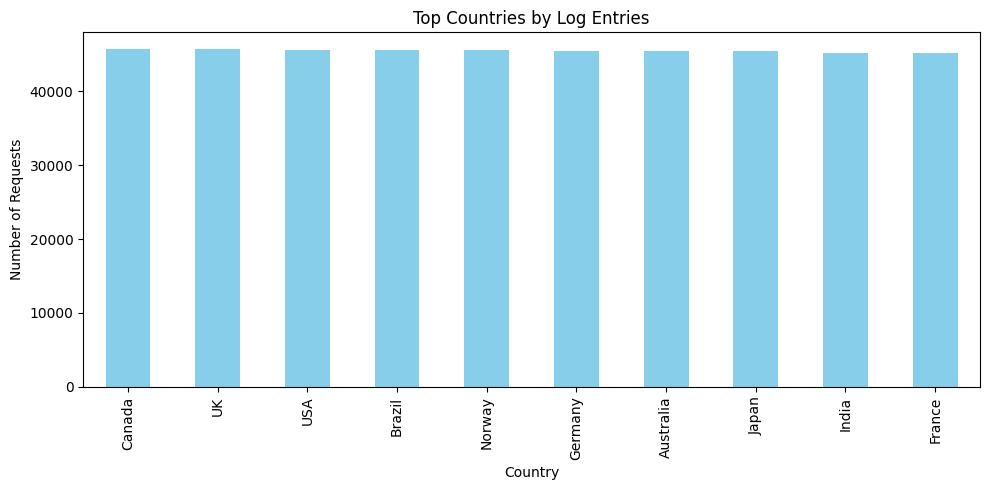

In [12]:
# Top countries by log volume
plt.figure(figsize=(10, 5))
df['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Countries by Log Entries")
plt.xlabel("Country")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


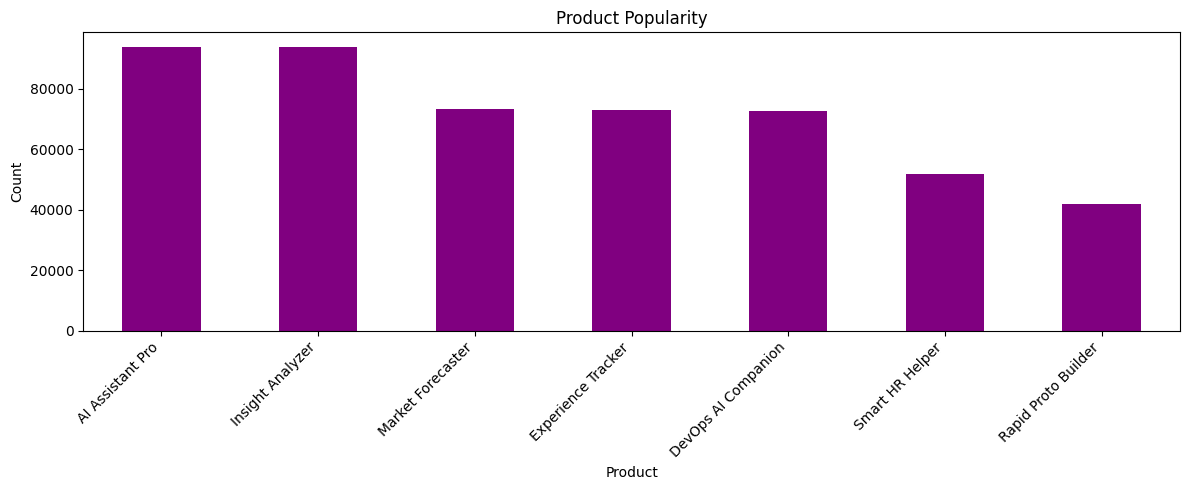

In [13]:
# Product popularity
plt.figure(figsize=(12, 5))
df['Product'].value_counts().plot(kind='bar', color='purple')
plt.title("Product Popularity")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

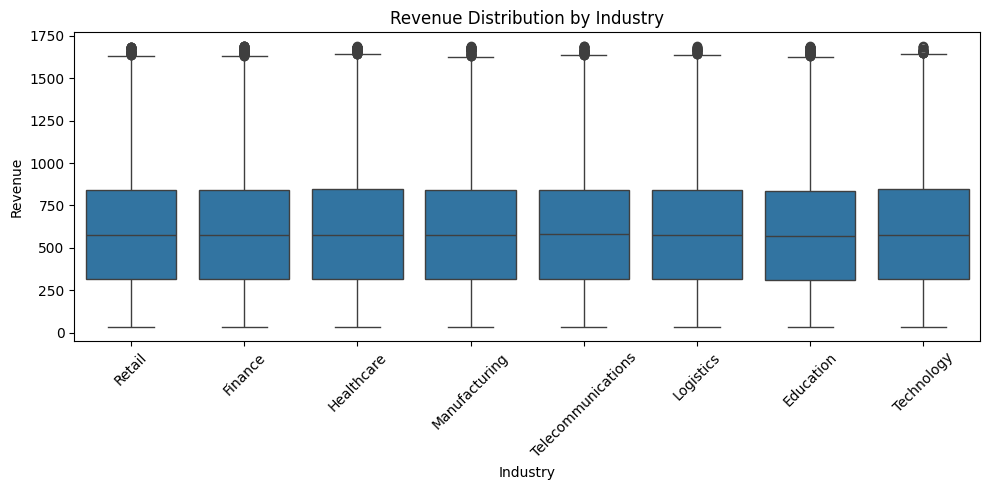

In [14]:
# Industry vs Revenue
plt.figure(figsize=(10, 5))
sns.boxplot(x='Industry', y='Revenue', data=df)
plt.title("Revenue Distribution by Industry")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\lpphu\AppData\Local\Temp\ipykernel_25788\2090300867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="AI Assistant Requests", data=df, palette='Set2')


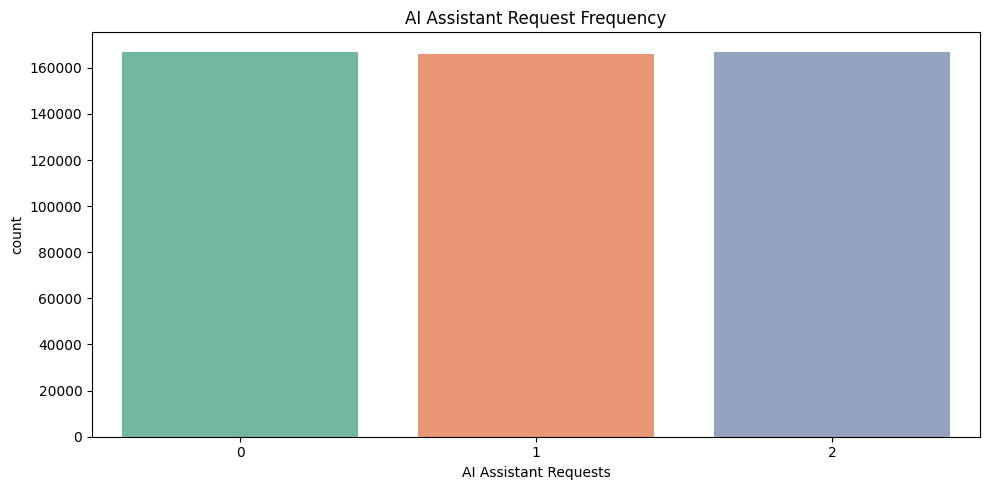

In [15]:
# AI Assistant usage
plt.figure(figsize=(10, 5))
sns.countplot(x="AI Assistant Requests", data=df, palette='Set2')
plt.title("AI Assistant Request Frequency")
plt.tight_layout()
plt.show()


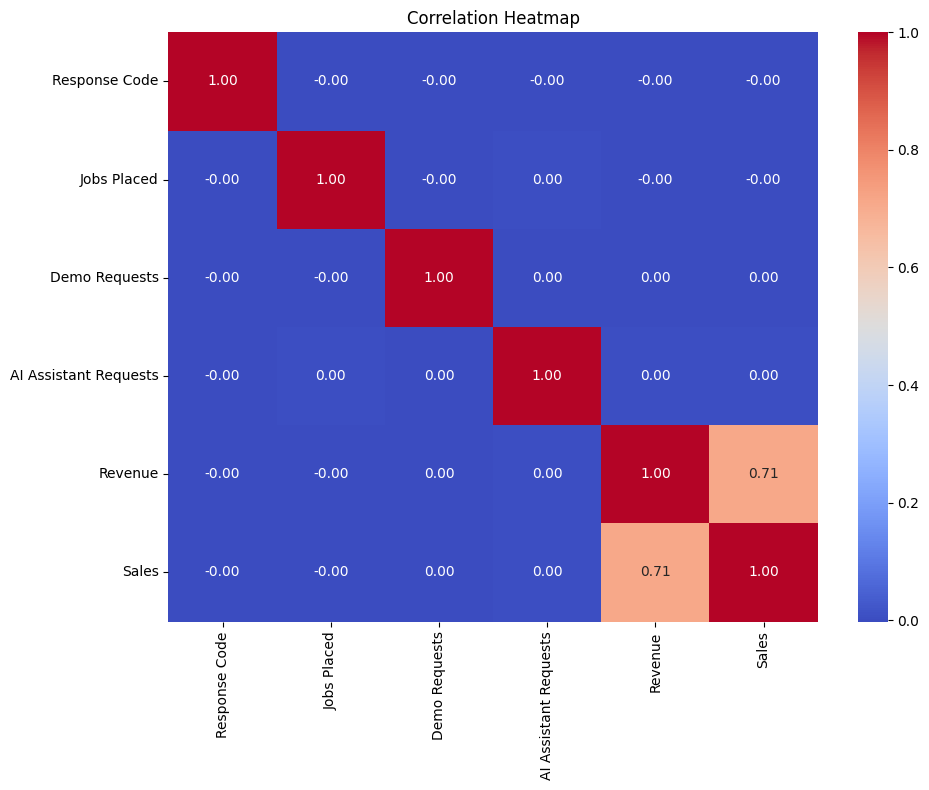

In [16]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [17]:
from IPython.display import FileLink

# Generate a downloadable link for the CSV
FileLink('web_logs_data1.csv')


c:\Users\lpphu\OneDrive - Botswana Accountancy College\333 Project Dev\333 CODES\web_logs_data1.csv

In [18]:
# Check for missing values
df.isnull().sum()

Timestamp                0
IP Address               0
Country                  0
Request Type             0
Resource Requested       0
Response Code            0
Jobs Placed              0
Demo Requests            0
AI Assistant Requests    0
Sales Channel            0
Salesperson              0
Salesperson ID           0
Retail Store             0
Revenue                  0
Sales                    0
Product                  0
Product ID               0
Industry                 0
Customer Name            0
Customer ID              0
Customer Segment         0
Date                     0
Hour                     0
dtype: int64

In [19]:
# Get basic statistics of numerical columns
df.describe()

,Timestamp,Response Code,Jobs Placed,Demo Requests,AI Assistant Requests,Revenue,Sales,Hour
count,500000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,2025-03-12 23:14:03.800268288,351.946296,4.497898,2.001164,0.999984,598.049212,11.569312,11.481990
min,2025-01-01 00:00:02,200.000000,0.000000,0.000000,0.000000,35.000000,1.000000,0.000000
25%,2025-02-05 09:44:26.249999872,200.000000,2.000000,1.000000,0.000000,315.000000,5.000000,5.000000
50%,2025-03-12 23:14:18,304.000000,4.000000,2.000000,1.000000,575.000000,9.000000,11.000000
75%,2025-04-17 11:55:41,404.000000,7.000000,3.000000,2.000000,843.000000,15.000000,17.000000
max,2025-05-22 21:00:14,500.000000,9.000000,4.000000,2.000000,1688.000000,80.000000,23.000000
std,NaN,111.785347,2.873140,1.413466,0.817345,339.714707,9.599707,6.916324


In [20]:
#Number of rows and columns
num_rows, num_columns = df.shape
print(f"Total Records: {num_rows}")
print(f"Total Columns: {num_columns}")


Total Records: 500000
Total Columns: 23


In [21]:
# Column names
df.columns


Index(['Timestamp', 'IP Address', 'Country', 'Request Type',
       'Resource Requested', 'Response Code', 'Jobs Placed', 'Demo Requests',
       'AI Assistant Requests', 'Sales Channel', 'Salesperson',
       'Salesperson ID', 'Retail Store', 'Revenue', 'Sales', 'Product',
       'Product ID', 'Industry', 'Customer Name', 'Customer ID',
       'Customer Segment', 'Date', 'Hour'],
      dtype='object')

In [22]:
# Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Timestamp              500000 non-null  datetime64[ns]
 1   IP Address             500000 non-null  object        
 2   Country                500000 non-null  object        
 3   Request Type           500000 non-null  object        
 4   Resource Requested     500000 non-null  object        
 5   Response Code          500000 non-null  int64         
 6   Jobs Placed            500000 non-null  int64         
 7   Demo Requests          500000 non-null  int64         
 8   AI Assistant Requests  500000 non-null  int64         
 9   Sales Channel          500000 non-null  object        
 10  Salesperson            500000 non-null  object        
 11  Salesperson ID         500000 non-null  object        
 12  Retail Store           500000 non-null  obje

In [23]:
# Display the first 5 rows
df.tail(20)

,Timestamp,IP Address,Country,Request Type,Resource Requested,Response Code,Jobs Placed,Demo Requests,AI Assistant Requests,Sales Channel,...,Revenue,Sales,Product,Product ID,Industry,Customer Name,Customer ID,Customer Segment,Date,Hour
499980,2025-02-22 19:02:25,160.245.65.22,Germany,GET,/images/events.jpg,200,2,2,0,Physical,...,710,7,Smart HR Helper,P0002,Healthcare,Miller-Browning,CUST690146,Individual,2025-02-22,19
499981,2025-02-03 14:46:49,17.31.166.85,Japan,POST,/images/events.jpg,200,8,4,2,Online,...,514,10,Market Forecaster,P0003,Logistics,Wallace Ltd,CUST190260,Individual,2025-02-03,14
499982,2025-05-10 16:58:59,178.167.176.199,Australia,POST,/index.html,500,7,3,2,Physical,...,1109,27,Experience Tracker,P0005,Retail,Garner LLC,CUST762887,Small Business,2025-05-10,16
499983,2025-02-04 19:13:35,76.187.142.72,Japan,POST,/images/events.jpg,500,3,1,2,Physical,...,163,3,DevOps AI Companion,P0004,Logistics,Perez Ltd,CUST525491,Enterprise,2025-02-04,19
499984,2025-02-26 20:03:10,214.72.107.204,Brazil,GET,/scheduledemo.php,404,2,0,0,Online,...,181,3,AI Assistant Pro,P0006,Technology,Parker-Hall,CUST490157,Individual,2025-02-26,20
499985,2025-02-21 09:46:46,126.171.215.103,Canada,POST,/index.html,200,3,3,2,Physical,...,137,2,DevOps AI Companion,P0004,Technology,Bailey and Sons,CUST434351,Enterprise,2025-02-21,9
499986,2025-02-08 07:33:17,90.180.118.39,Australia,POST,/index.html,304,2,0,1,Online,...,306,8,AI Assistant Pro,P0006,Healthcare,Rodriguez Inc,CUST894659,Individual,2025-02-08,7
499987,2025-01-05 14:45:34,191.234.52.200,India,POST,/scheduledemo.php,304,6,0,1,Online,...,729,7,Rapid Proto Builder,P0007,Retail,"Fowler, Lee and Barajas",CUST410575,Small Business,2025-01-05,14
499988,2025-03-14 18:54:50,153.29.108.184,Brazil,POST,/scheduledemo.php,304,3,2,2,Physical,...,272,6,Smart HR Helper,P0002,Education,Carson Inc,CUST725850,Enterprise,2025-03-14,18
499989,2025-04-21 07:23:04,167.57.226.124,India,GET,/scheduledemo.php,404,3,0,0,Online,...,369,12,AI Assistant Pro,P0006,Finance,"Martin, Gray and Galvan",CUST746237,Small Business,2025-04-21,7


C:\Users\lpphu\AppData\Local\Temp\ipykernel_25788\573443495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")


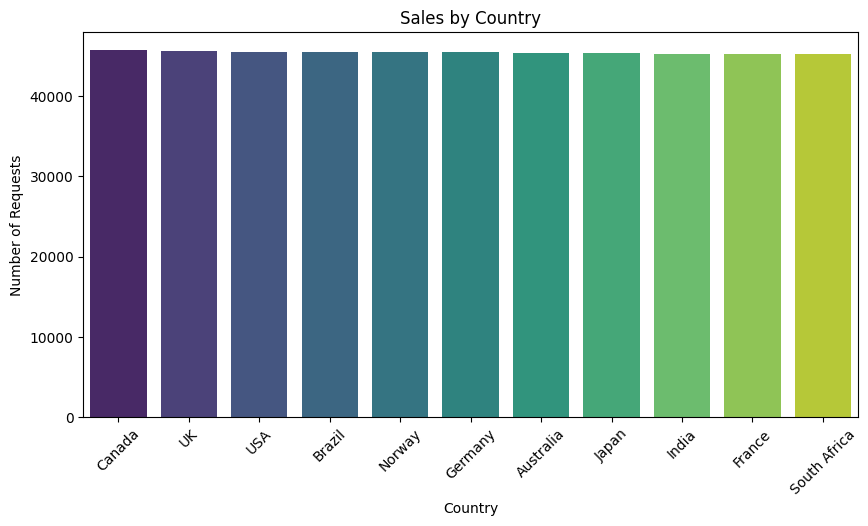

In [24]:
#Count of requests by country
import matplotlib.pyplot as plt
import seaborn as sns

# Count sales by country
country_sales = df["Country"].value_counts()

# Plot sales by country
plt.figure(figsize=(10, 5))
sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Requests")
plt.title("Sales by Country")
plt.show()

In [25]:
df["Conversion Rate"] = (df["Demo Requests"] / df["Jobs Placed"].replace(0, np.nan)).fillna(0) * 100
# Average conversion rate
avg_conversion_rate = df["Conversion Rate"].mean()
print(f"Average Conversion Rate: {avg_conversion_rate:.2f}%")

Average Conversion Rate: 56.78%


DATA PREPARATION

In [26]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Timestamp                0
IP Address               0
Country                  0
Request Type             0
Resource Requested       0
Response Code            0
Jobs Placed              0
Demo Requests            0
AI Assistant Requests    0
Sales Channel            0
Salesperson              0
Salesperson ID           0
Retail Store             0
Revenue                  0
Sales                    0
Product                  0
Product ID               0
Industry                 0
Customer Name            0
Customer ID              0
Customer Segment         0
Date                     0
Hour                     0
Conversion Rate          0
dtype: int64


In [27]:
# Drop duplicates
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate records.")

Removed 0 duplicate records.


In [28]:
#Number of rows and columns
num_rows, num_columns = df.shape
print(f"Total Records: {num_rows}")
print(f"Total Columns: {num_columns}")

Total Records: 500000
Total Columns: 24


In [29]:
# Verify data types
print("\nData types:\n", df.dtypes)


Data types:
 Timestamp                datetime64[ns]
IP Address                       object
Country                          object
Request Type                     object
Resource Requested               object
Response Code                     int64
Jobs Placed                       int64
Demo Requests                     int64
AI Assistant Requests             int64
Sales Channel                    object
Salesperson                      object
Salesperson ID                   object
Retail Store                     object
Revenue                           int64
Sales                             int64
Product                          object
Product ID                       object
Industry                         object
Customer Name                    object
Customer ID                      object
Customer Segment                 object
Date                             object
Hour                              int32
Conversion Rate                 float64
dtype: object


In [30]:
# Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [31]:
#Encoding Categorical Features
# Encode selected categorical columns
%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ["Country", "Salesperson", "Sales Channel"]:
    le = LabelEncoder()
    df[col + "_Encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le


Note: you may need to restart the kernel to use updated packages.


In [32]:
# Detect outliers in Revenue using IQR
Q1 = df["Revenue"].quantile(0.25)
Q3 = df["Revenue"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Revenue"] >= lower_bound) & (df["Revenue"] <= upper_bound)]
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (499714, 27)


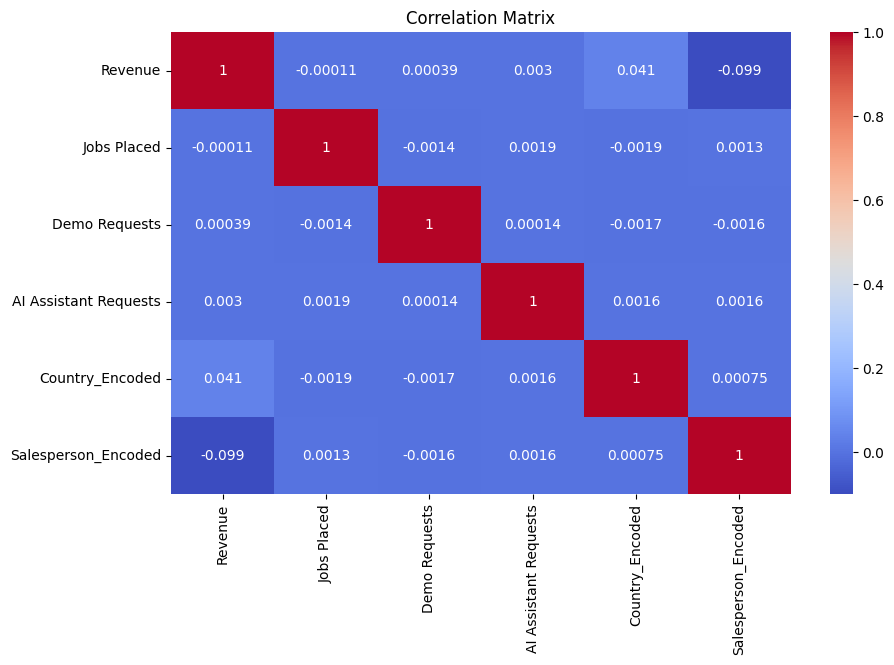

In [33]:
#Feature Selection & Correlation Analysis
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Revenue", "Jobs Placed", "Demo Requests", "AI Assistant Requests", "Country_Encoded", "Salesperson_Encoded"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [34]:

#Feature Engineering & Scaling
# Select features for clustering
features = ["Revenue", "Jobs Placed", "Demo Requests", "AI Assistant Requests", "Country_Encoded", "Salesperson_Encoded"]


In [35]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [36]:
# 6. Dimensionality Reduction (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Add PCA results to the dataframe
df["PCA1"] = pca_components[:, 0]
df["PCA2"] = pca_components[:, 1]

In [37]:

#Feature Importance (Optional - Supervised Insight)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Train a random forest to estimate feature importance on Revenue
X = df[features].drop("Revenue", axis=1)
y = df["Revenue"]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

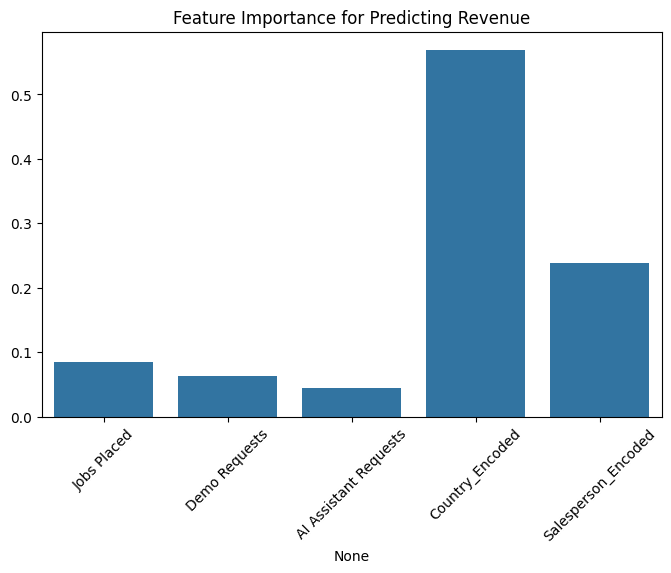

In [38]:
# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=importances)
plt.title("Feature Importance for Predicting Revenue")
plt.xticks(rotation=45)
plt.show()

In [39]:

#Save processed dataset (optional)
df.to_csv("web_logs_data1.csv", index=False)
print("Data preparation completed. Cleaned dataset saved as web_logs_data1.")

Data preparation completed. Cleaned dataset saved as web_logs_data1.


In [40]:
# Column names
df.columns

Index(['Timestamp', 'IP Address', 'Country', 'Request Type',
       'Resource Requested', 'Response Code', 'Jobs Placed', 'Demo Requests',
       'AI Assistant Requests', 'Sales Channel', 'Salesperson',
       'Salesperson ID', 'Retail Store', 'Revenue', 'Sales', 'Product',
       'Product ID', 'Industry', 'Customer Name', 'Customer ID',
       'Customer Segment', 'Date', 'Hour', 'Conversion Rate',
       'Country_Encoded', 'Salesperson_Encoded', 'Sales Channel_Encoded',
       'PCA1', 'PCA2'],
      dtype='object')